#Prediction of bike rental count hourly based on environmental and seasonal settings

## import libraries

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
from scipy.stats import norm

In [144]:
import sklearn as sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
from statsmodels.graphics.gofplots import qqplot

In [5]:
bike = pd.read_csv('/Users/chan/Library/Mobile Documents/com~apple~CloudDocs/hour.csv')

In [6]:
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
bike.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


##check type of data


In [8]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#There is one object "dteday", change it to category 

In [9]:
bike['dteday'] =bike['dteday'].astype('category')

##run df.dtypes again

In [10]:
bike.dtypes

instant          int64
dteday        category
season           int64
yr               int64
mnth             int64
hr               int64
holiday          int64
weekday          int64
workingday       int64
weathersit       int64
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

## Define columns

In [11]:
bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
bike.shape

(17379, 17)

##season: season (1:winter, 2:spring, 3:summer, 4:fall)
##weathersit: (1: clear, 2: Mist Cloudy, 3: Light snow, 4: Heavy Rain)
##yr : year (0: 2011, 1:2012)
##mnth : month ( 1 to 12)
##hr : hour (0 to 23)
##Temp: Temp in Celsius. 41 max
##aTemp: feeling temp in Celsius. 50 max
##windspeed: 67 max
##casual: count of casual users
##registered: count of registered users
##cnt: count of total rental bikes including both casual and registered

In [13]:
bike1=bike[['mnth','season', 'weekday', 'workingday','weathersit','temp','casual', 'hum','windspeed','registered','cnt', 'hr']]

In [14]:
bike1.head()

,mnth,season,weekday,workingday,weathersit,temp,casual,hum,windspeed,registered,cnt,hr
0,1,1,6,0,1,0.24,3,0.81,0.0,13,16,0
1,1,1,6,0,1,0.22,8,0.80,0.0,32,40,1
2,1,1,6,0,1,0.22,5,0.80,0.0,27,32,2
3,1,1,6,0,1,0.24,3,0.75,0.0,10,13,3
4,1,1,6,0,1,0.24,0,0.75,0.0,1,1,4


In [15]:
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mnth        17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   weekday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weathersit  17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   casual      17379 non-null  int64  
 7   hum         17379 non-null  float64
 8   windspeed   17379 non-null  float64
 9   registered  17379 non-null  int64  
 10  cnt         17379 non-null  int64  
 11  hr          17379 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.6 MB


## Check for missing data

In [16]:
bike1.isnull().sum()

mnth          0
season        0
weekday       0
workingday    0
weathersit    0
temp          0
casual        0
hum           0
windspeed     0
registered    0
cnt           0
hr            0
dtype: int64

In [17]:
bike1.apply(lambda x: len(x.unique()))

mnth           12
season          4
weekday         7
workingday      2
weathersit      4
temp           50
casual        322
hum            89
windspeed      30
registered    776
cnt           869
hr             24
dtype: int64

In [18]:
bike1.rename(columns={'mnth':'month', 'weathersit': 'weather', 'cnt':'count', 'hum':'humidity'})

,month,season,weekday,workingday,weather,temp,casual,humidity,windspeed,registered,count,hr
0,1,1,6,0,1,0.24,3,0.81,0.0000,13,16,0
1,1,1,6,0,1,0.22,8,0.80,0.0000,32,40,1
2,1,1,6,0,1,0.22,5,0.80,0.0000,27,32,2
3,1,1,6,0,1,0.24,3,0.75,0.0000,10,13,3
4,1,1,6,0,1,0.24,0,0.75,0.0000,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,12,1,1,1,2,0.26,11,0.60,0.1642,108,119,19
17375,12,1,1,1,2,0.26,8,0.60,0.1642,81,89,20
17376,12,1,1,1,1,0.26,7,0.60,0.1642,83,90,21
17377,12,1,1,1,1,0.26,13,0.56,0.1343,48,61,22


In [19]:
bike1['mnth'] =bike1['mnth'].astype('category')

/var/folders/ly/syvts3sx3t108vdwn0gmszhw0000gn/T/ipykernel_6103/2897880502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike1['mnth'] =bike1['mnth'].astype('category')


In [20]:
bike1.dtypes

mnth          category
season           int64
weekday          int64
workingday       int64
weathersit       int64
temp           float64
casual           int64
hum            float64
windspeed      float64
registered       int64
cnt              int64
hr               int64
dtype: object

In [21]:
cols=['weekday', 'workingday', 'weathersit']

In [22]:
for col in cols:
    bike1[col]= bike1[col].astype('category')

/var/folders/ly/syvts3sx3t108vdwn0gmszhw0000gn/T/ipykernel_6103/2502563669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike1[col]= bike1[col].astype('category')
/var/folders/ly/syvts3sx3t108vdwn0gmszhw0000gn/T/ipykernel_6103/2502563669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike1[col]= bike1[col].astype('category')
/var/folders/ly/syvts3sx3t108vdwn0gmszhw0000gn/T/ipykernel_6103/2502563669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [23]:
bike1.dtypes

mnth          category
season           int64
weekday       category
workingday    category
weathersit    category
temp           float64
casual           int64
hum            float64
windspeed      float64
registered       int64
cnt              int64
hr               int64
dtype: object

In [24]:
bike2 = bike1.rename(columns={'mnth':'month', 'weathersit': 'weather', 'cnt':'count','hum':'humidity'})

In [25]:
bike2.head()

,month,season,weekday,workingday,weather,temp,casual,humidity,windspeed,registered,count,hr
0,1,1,6,0,1,0.24,3,0.81,0.0,13,16,0
1,1,1,6,0,1,0.22,8,0.80,0.0,32,40,1
2,1,1,6,0,1,0.22,5,0.80,0.0,27,32,2
3,1,1,6,0,1,0.24,3,0.75,0.0,10,13,3
4,1,1,6,0,1,0.24,0,0.75,0.0,1,1,4


In [26]:
bike2.dtypes

month         category
season           int64
weekday       category
workingday    category
weather       category
temp           float64
casual           int64
humidity       float64
windspeed      float64
registered       int64
count            int64
hr               int64
dtype: object

## Data Analysis

##Data exploration

[Text(0.5, 1.0, 'Count of bikes during week')]

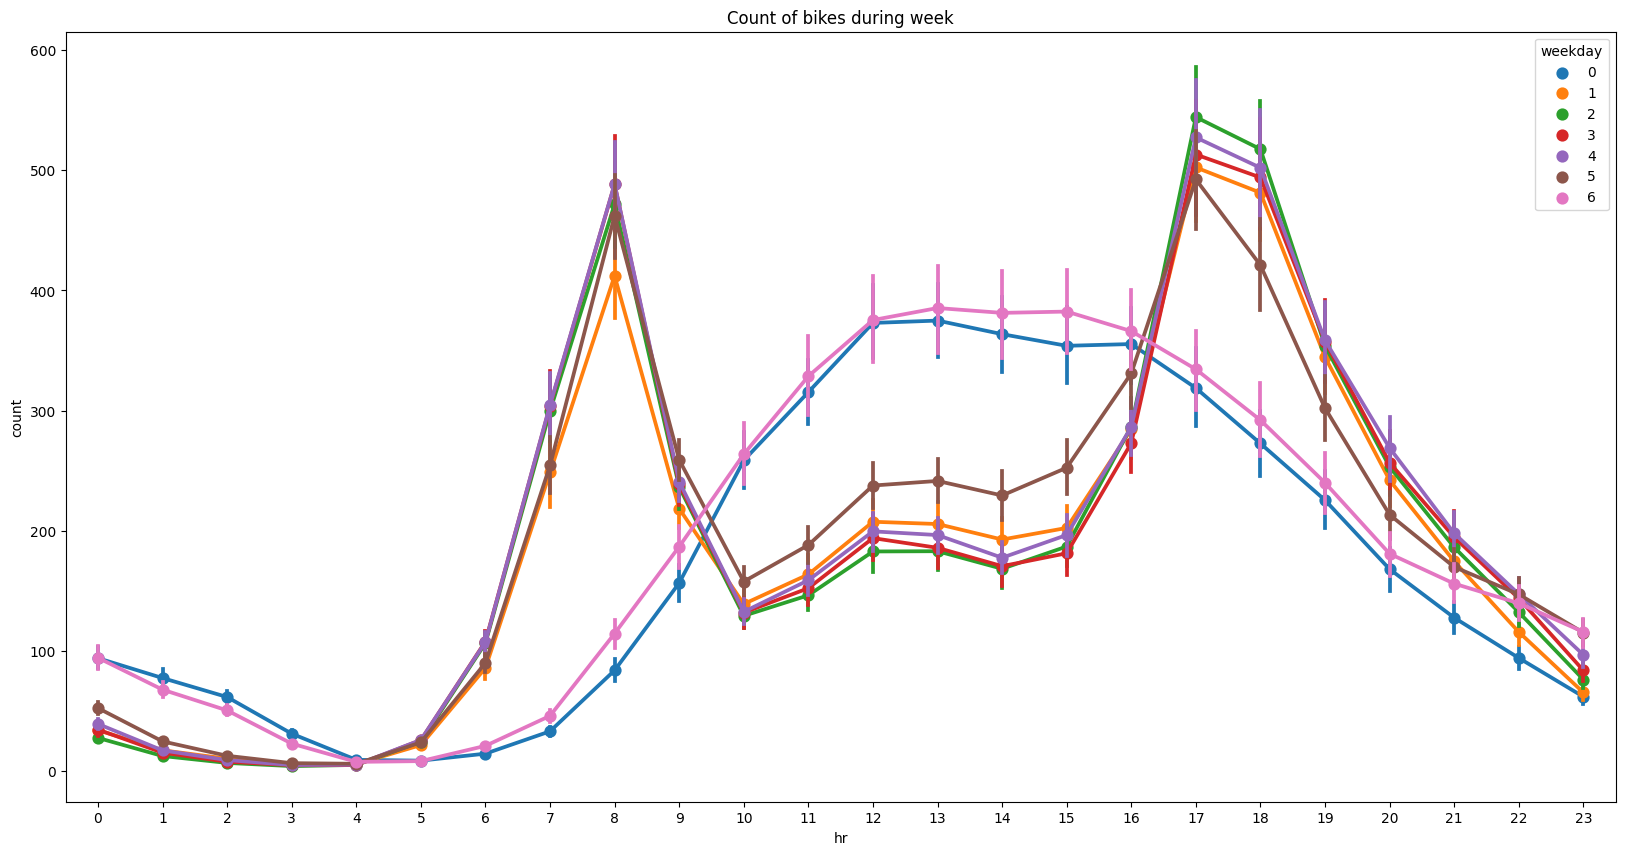

In [27]:
fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=bike2, x= 'hr', y= 'count', hue='weekday', ax=ax)
ax.set(title = 'Count of bikes during week')

[Text(0.5, 1.0, 'Count of bikes throughout the seasons')]

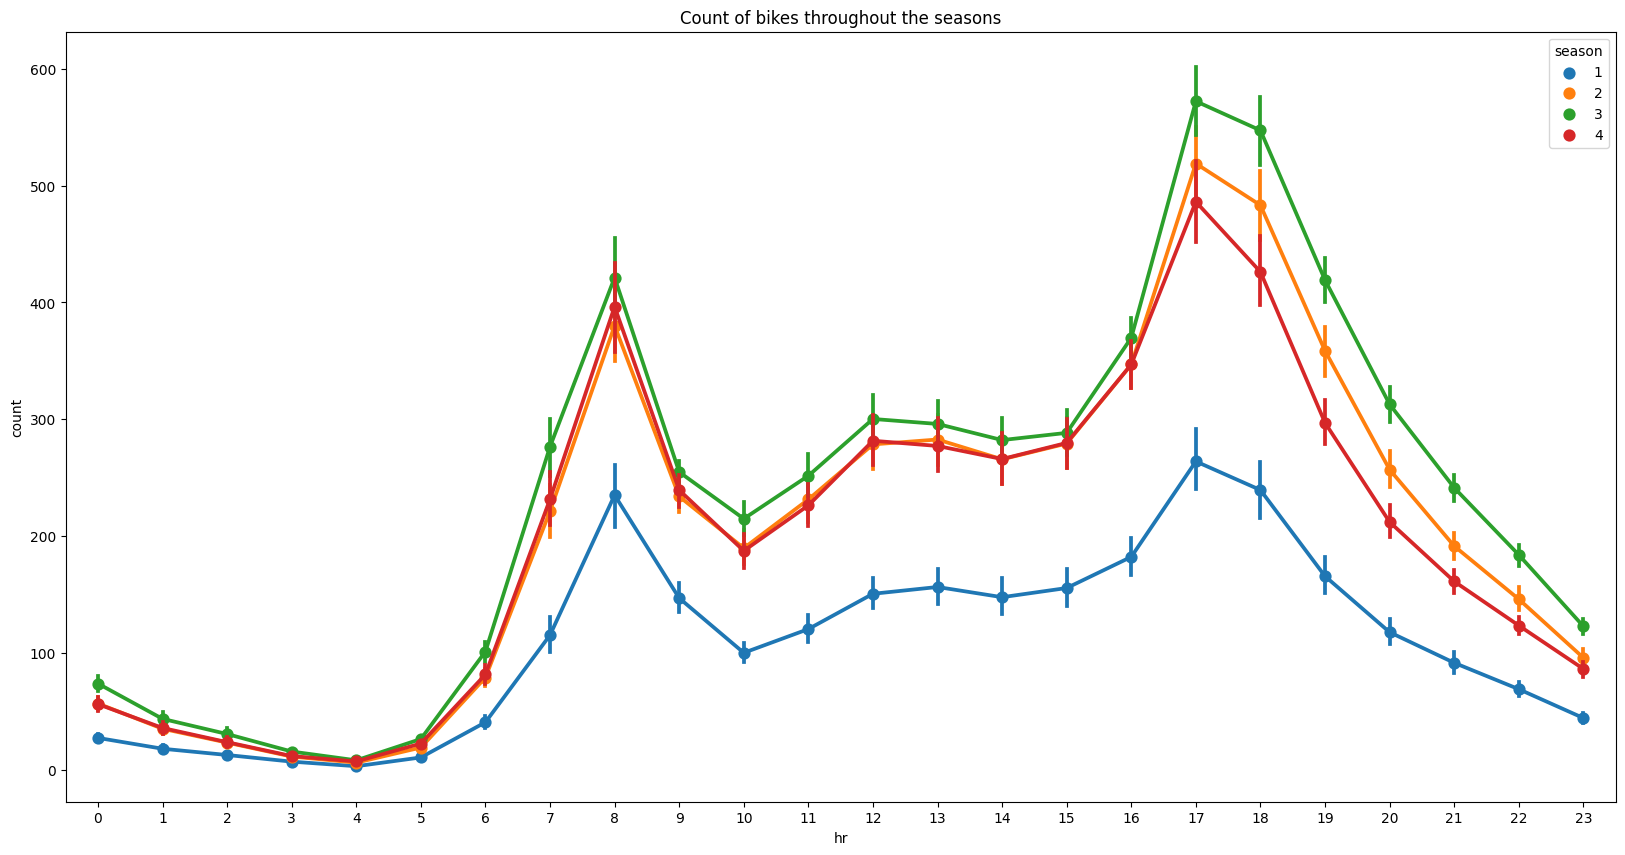

In [28]:
fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=bike2, x= 'hr', y= 'count', hue='season', ax=ax)
ax.set(title = 'Count of bikes throughout the seasons')

#observation early mornings the count is zero per hour
#possible reasons : business is not yet open,
#around six am the count increases and slightly higher during the spring and and summer throughout the day and it tapers off around 5pm in the winter and increases at the same time during summer,spring and fall months

[Text(0.5, 1.0, 'Count of bikes through weather changes')]

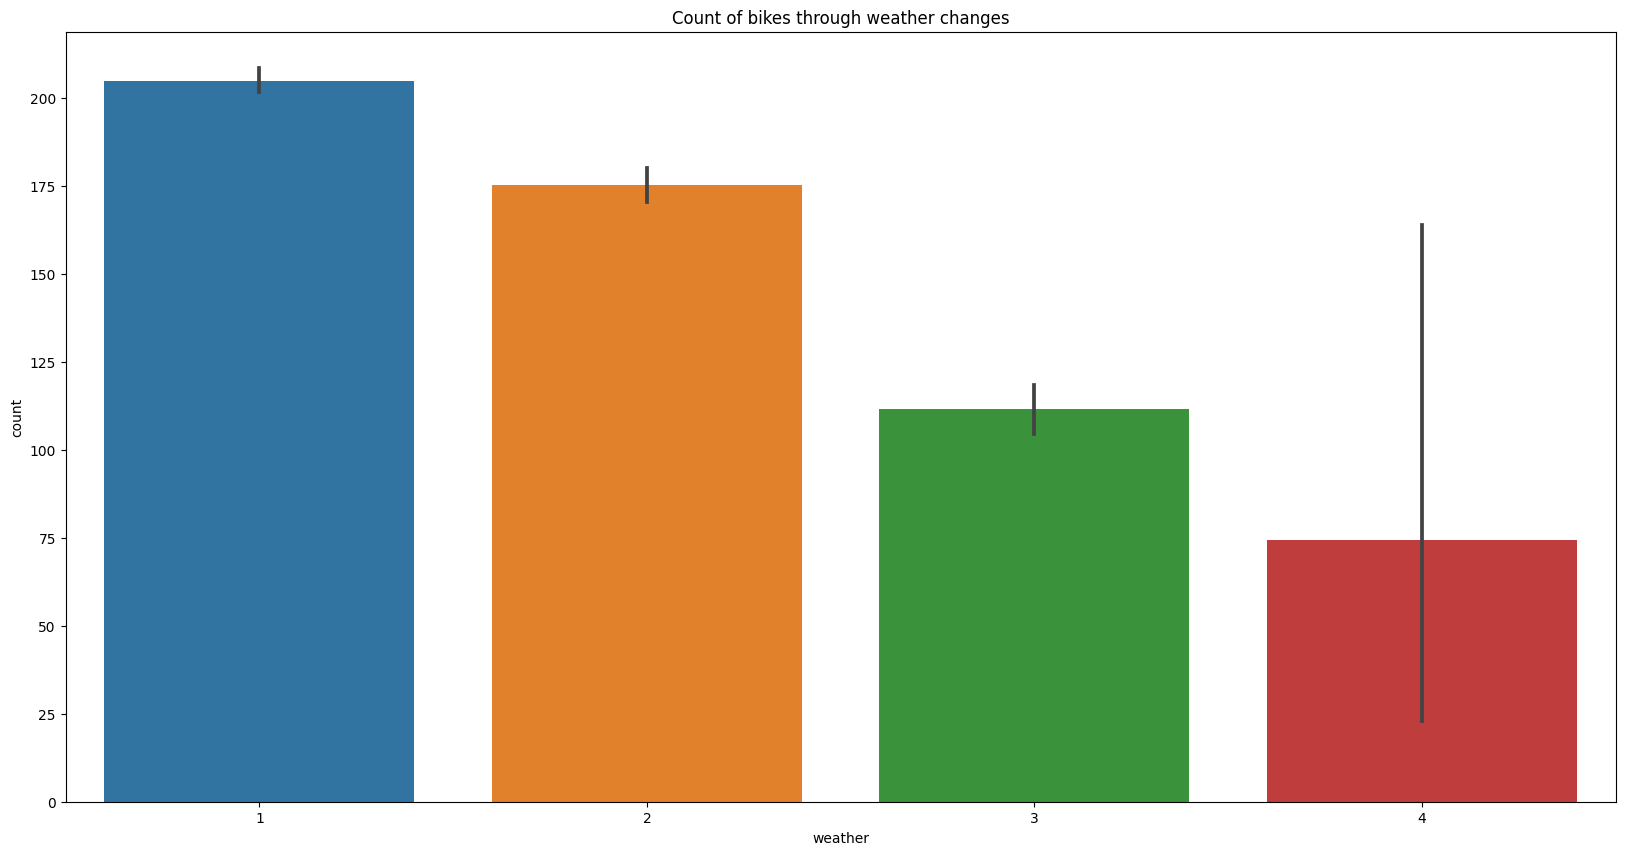

In [29]:
fig, ax=plt.subplots(figsize=(20,10))
sns.barplot(data=bike2, x= 'weather', y= 'count', ax=ax)
ax.set(title = 'Count of bikes through weather changes')

[Text(0.5, 1.0, 'Count of bikes rentals during months of the year')]

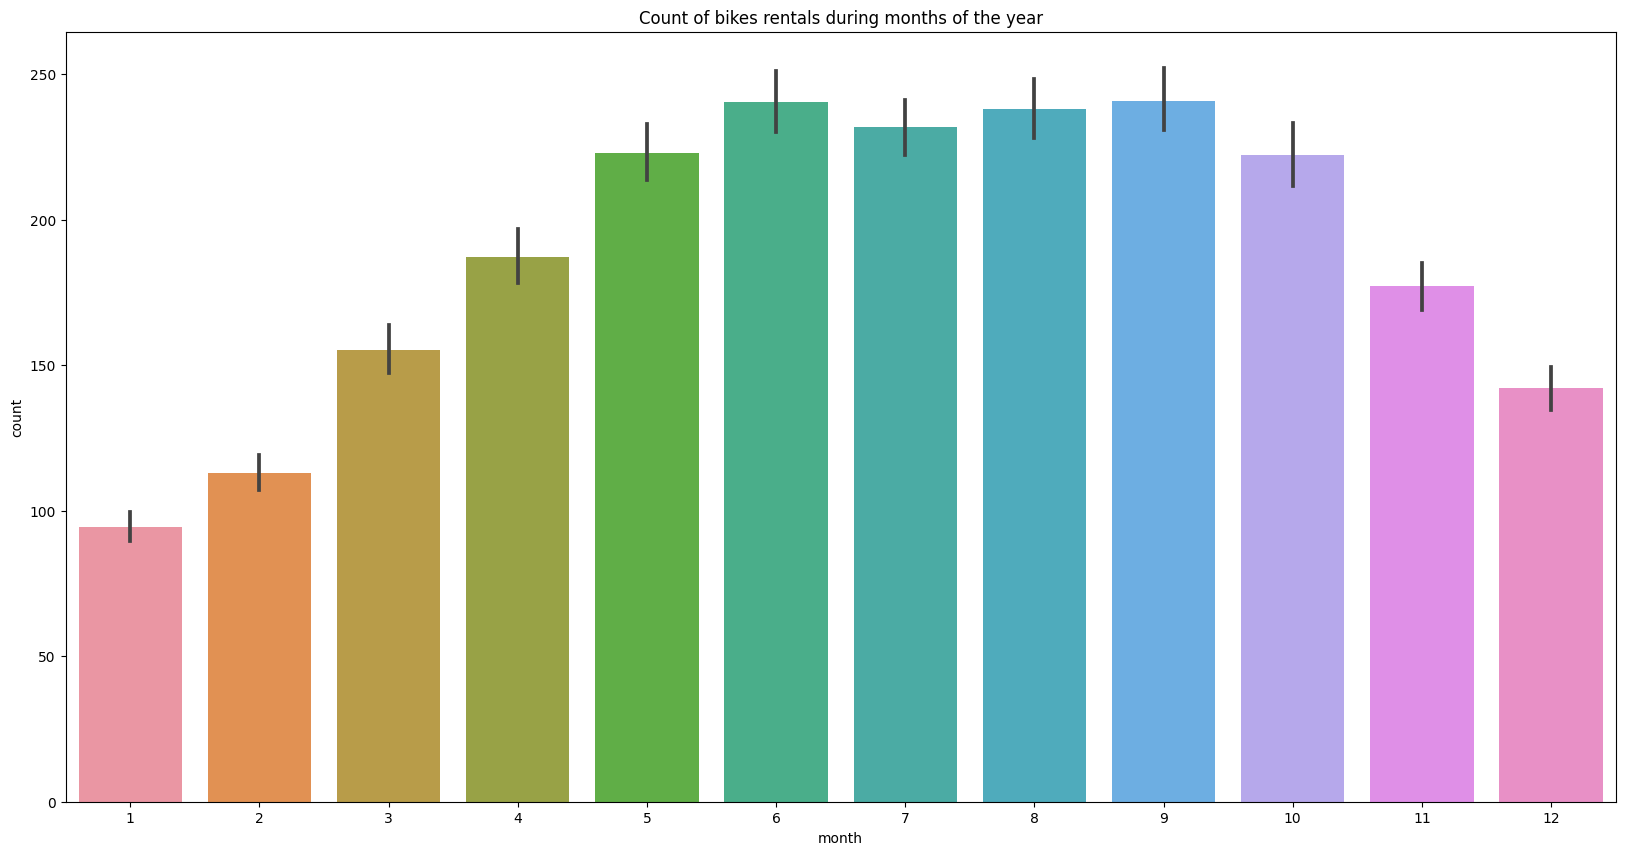

In [30]:
fig, ax=plt.subplots(figsize=(20,10))
sns.barplot(data=bike2, x= 'month', y= 'count', ax=ax)
ax.set(title = 'Count of bikes rentals during months of the year')

##bike rental count increased  significantly during spring and summer months

[Text(0.5, 1.0, 'Count of bikes during week')]

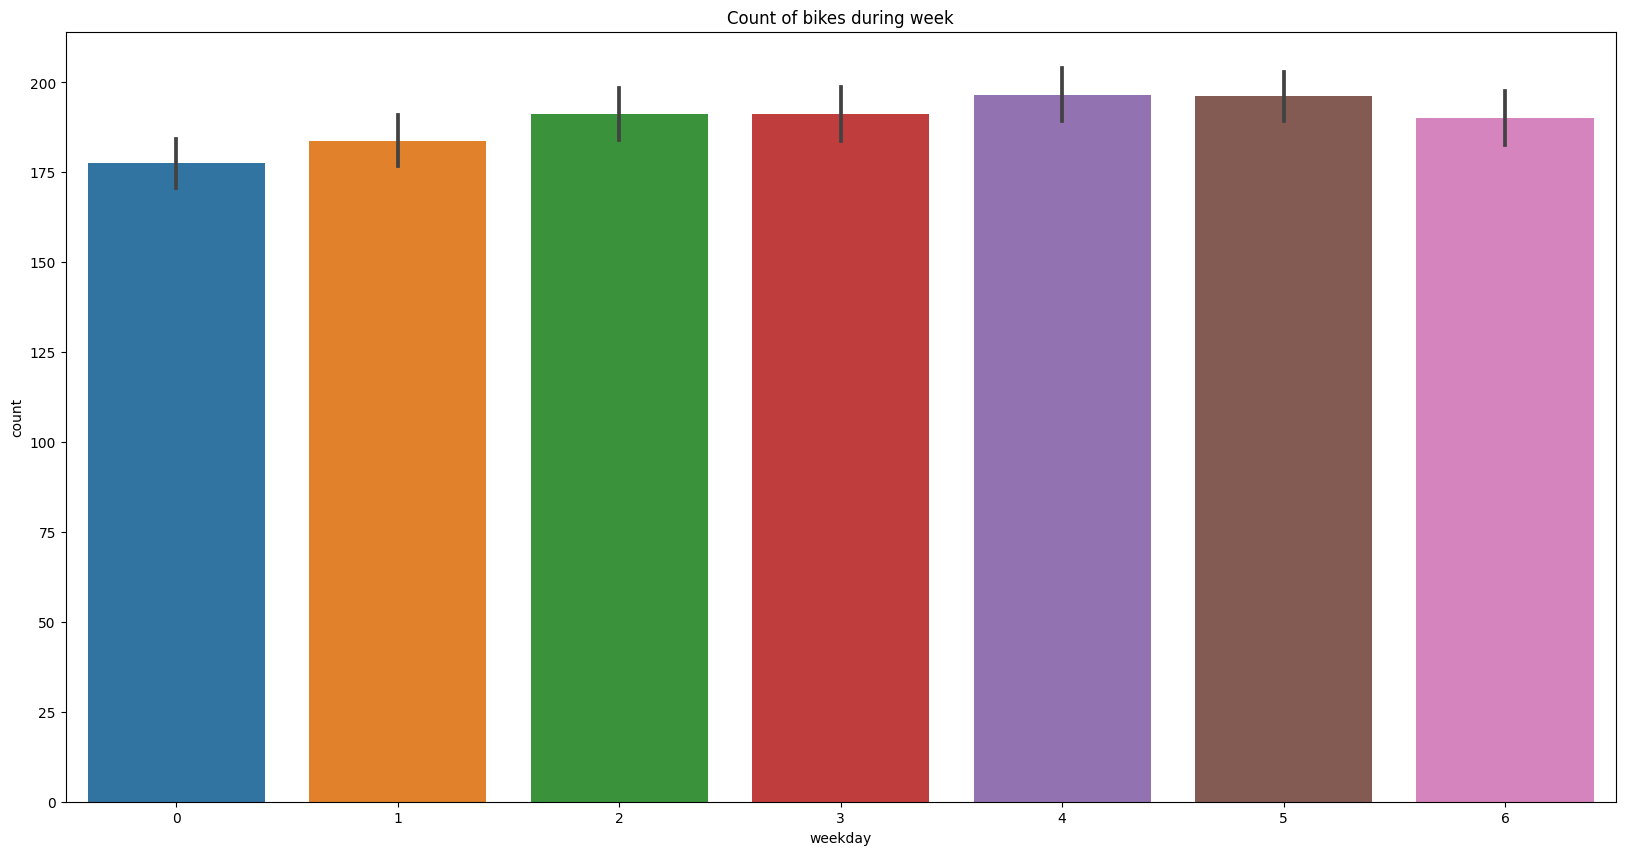

In [31]:
fig, ax=plt.subplots(figsize=(20,10))
sns.barplot(data=bike2, x= 'weekday', y= 'count', ax=ax)
ax.set(title = 'Count of bikes during week')

##Data visualization

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'registered'}>],
       [<AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'hr'}>, <AxesSubplot:>]],
      dtype=object)

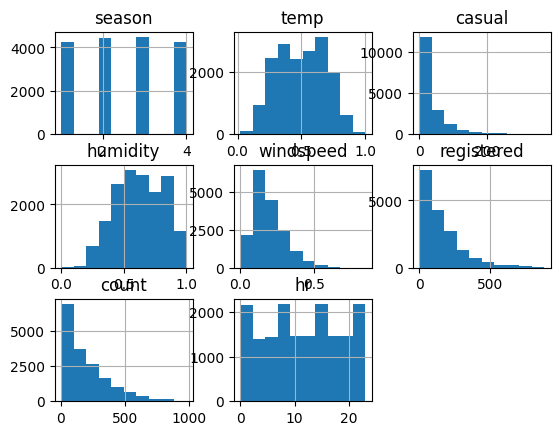

In [32]:
bike2.hist()

<AxesSubplot:>

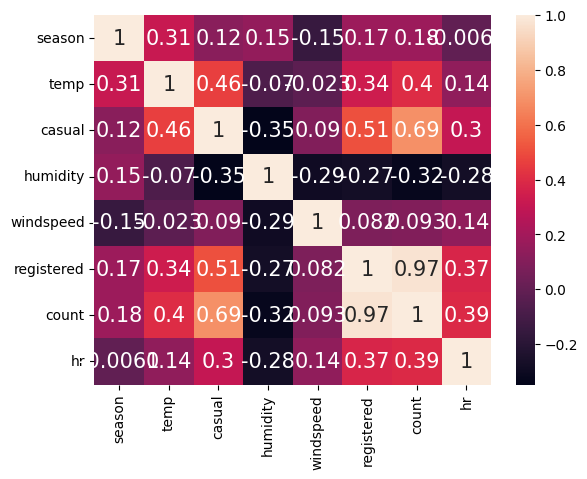

In [33]:

sns.heatmap(bike2.corr(), annot = True, annot_kws={'size':15})




#there is high correlation between hr of the day and count and some correlation between temp and count
##there is also significant correlation between casual riders and temp, which can show that people who are not registered tend to rent bikes during ideal weather conditions

In [34]:
bike2.corr()

,season,temp,casual,humidity,windspeed,registered,count,hr
season,1.000000,0.312025,0.120206,0.150625,-0.149773,0.174226,0.178056,-0.006117
temp,0.312025,1.000000,0.459616,-0.069881,-0.023125,0.335361,0.404772,0.137603
casual,0.120206,0.459616,1.000000,-0.347028,0.090287,0.506618,0.694564,0.301202
humidity,0.150625,-0.069881,-0.347028,1.000000,-0.290105,-0.273933,-0.322911,-0.276498
windspeed,-0.149773,-0.023125,0.090287,-0.290105,1.000000,0.082321,0.093234,0.137252
registered,0.174226,0.335361,0.506618,-0.273933,0.082321,1.000000,0.972151,0.374141
count,0.178056,0.404772,0.694564,-0.322911,0.093234,0.972151,1.000000,0.394071
hr,-0.006117,0.137603,0.301202,-0.276498,0.137252,0.374141,0.394071,1.000000


In [35]:
bike2.head()

,month,season,weekday,workingday,weather,temp,casual,humidity,windspeed,registered,count,hr
0,1,1,6,0,1,0.24,3,0.81,0.0,13,16,0
1,1,1,6,0,1,0.22,8,0.80,0.0,32,40,1
2,1,1,6,0,1,0.22,5,0.80,0.0,27,32,2
3,1,1,6,0,1,0.24,3,0.75,0.0,10,13,3
4,1,1,6,0,1,0.24,0,0.75,0.0,1,1,4


[Text(0.5, 1.0, 'Relation of windspeed and rental count')]

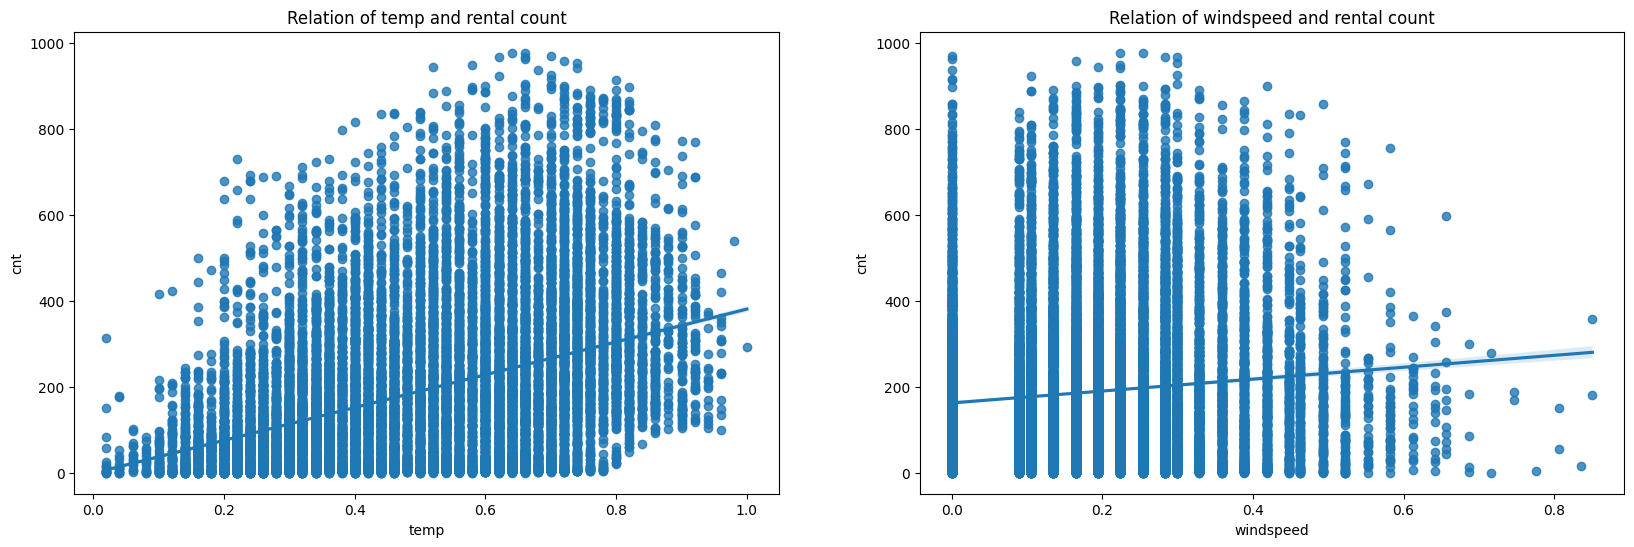

In [36]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.regplot(x=bike['temp'], y= bike['cnt'], ax=ax1)
ax1.set(title = 'Relation of temp and rental count')
sns.regplot(x=bike['windspeed'], y= bike['cnt'], ax=ax2)
ax2.set(title = 'Relation of windspeed and rental count')

##as the temp increased the rental counts increased but as windspeed increased fewer bikes were rented

[Text(0.5, 1.0, 'Theoritical quantiles')]

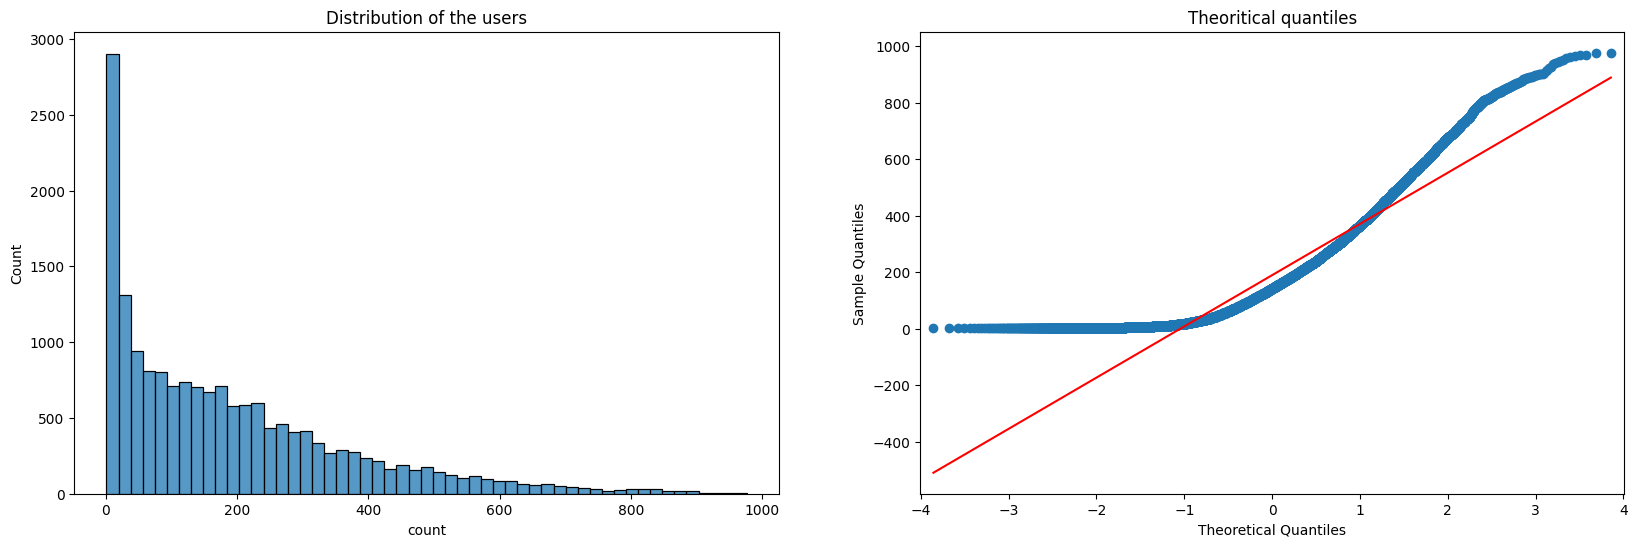

In [37]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.histplot(bike2['count'],
ax=ax1)
ax1.set(title= 'Distribution of the users')
qqplot(bike2['count'],
ax=ax2,
line= "s")
ax2.set(title='Theoritical quantiles')

##the distribution is skewed left


In [38]:
bike2.describe()

,season,temp,casual,humidity,windspeed,registered,count,hr
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.496987,35.676218,0.627229,0.190098,153.786869,189.463088,11.546752
std,1.106918,0.192556,49.305030,0.192930,0.122340,151.357286,181.387599,6.914405
min,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.340000,4.000000,0.480000,0.104500,34.000000,40.000000,6.000000
50%,3.000000,0.500000,17.000000,0.630000,0.194000,115.000000,142.000000,12.000000
75%,3.000000,0.660000,48.000000,0.780000,0.253700,220.000000,281.000000,18.000000
max,4.000000,1.000000,367.000000,1.000000,0.850700,886.000000,977.000000,23.000000


In [39]:
bike2.skew()

/var/folders/ly/syvts3sx3t108vdwn0gmszhw0000gn/T/ipykernel_6103/1175873757.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bike2.skew()


season       -0.005416
temp         -0.006021
casual        2.499237
humidity     -0.111287
windspeed     0.574905
registered    1.557904
count         1.277412
hr           -0.010680
dtype: float64

In [40]:
bike2.kurtosis()

/var/folders/ly/syvts3sx3t108vdwn0gmszhw0000gn/T/ipykernel_6103/259487507.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bike2.kurtosis()


season       -1.334251
temp         -0.941844
casual        7.571002
humidity     -0.826117
windspeed     0.590820
registered    2.750018
count         1.417203
hr           -1.198021
dtype: float64

##casual is the variable that is skewed and showing Kurtosis. I believe this because casual riders dont have a set schedule of renting bikes, they rent them whenever they feel like it 

In [41]:
bike2.value_counts()

month  season  weekday  workingday  weather  temp  casual  humidity  windspeed  registered  count  hr
7      3       2        1           1        0.66  0       0.83      0.0896     6           6      4     2
12     4       6        0           1        0.24  1       0.65      0.1045     10          11     6     2
1      1       0        0           1        0.02  1       0.62      0.1343     4           5      3     1
9      3       0        0           1        0.50  3       0.72      0.0000     10          13     5     1
                                             0.52  12      0.77      0.2537     16          28     4     1
                                                                                                        ..
5      2       0        0           1        0.72  209     0.45      0.3284     340         549    17    1
                                                   225     0.42      0.2537     339         564    16    1
                                          

<AxesSubplot:xlabel='count', ylabel='Count'>

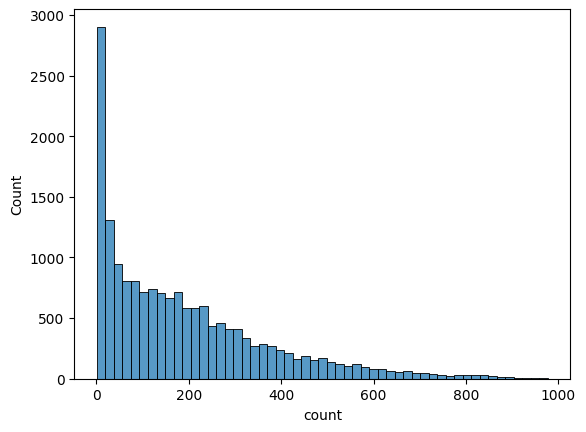

In [42]:
sns.histplot(bike2['count'])

<AxesSubplot:xlabel='casual', ylabel='Count'>

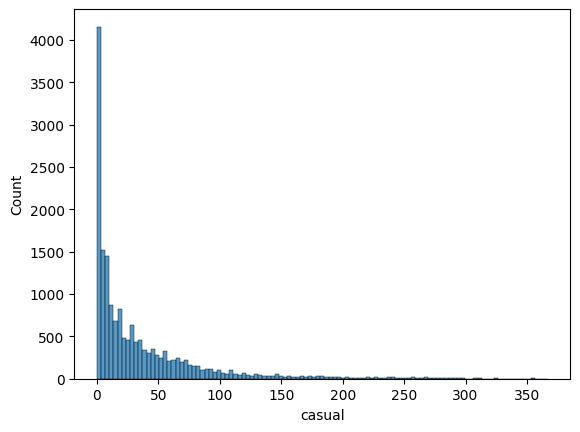

In [43]:
sns.histplot(bike2['casual'])

<AxesSubplot:xlabel='registered', ylabel='Count'>

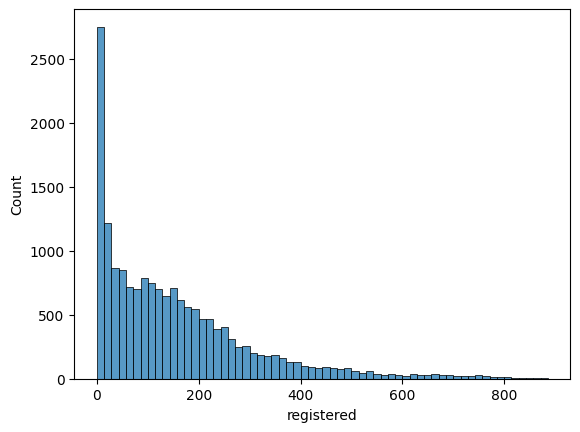

In [44]:
sns.histplot(bike2['registered'])

In [45]:
bike2['casualSQRT'] = np.sqrt(bike2['casual'])

<AxesSubplot:xlabel='casualSQRT', ylabel='Count'>

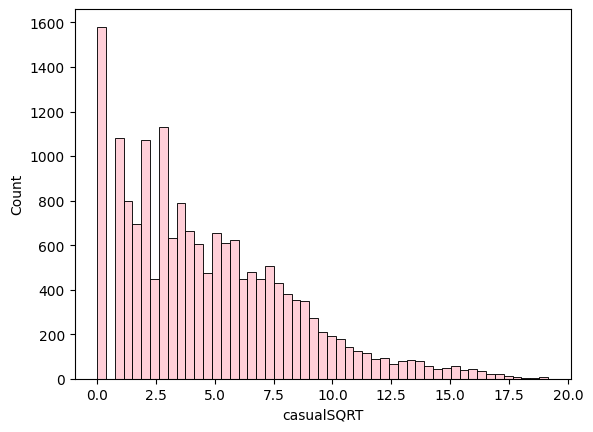

In [46]:
sns.histplot(bike2['casualSQRT'], color='pink')

In [47]:
bike2['casualLOG'] = np.log(bike2['casual'])

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='casualLOG', ylabel='Count'>

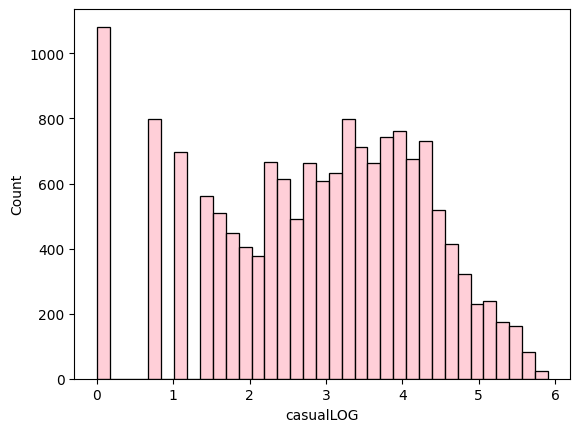

In [48]:
sns.histplot(bike2['casualLOG'], color= 'pink')

In [49]:
bike2.dropna(inplace=True)

<AxesSubplot:xlabel='casualLOG', ylabel='Count'>

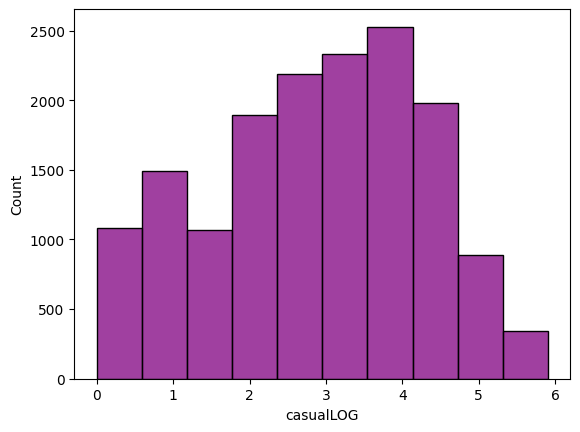

In [50]:
sns.histplot(bike2['casualLOG'], bins=10, color= 'purple')

In [51]:
bike2['registeredSQRT'] = np.sqrt(bike2['registered'])

<AxesSubplot:xlabel='registeredSQRT', ylabel='Count'>

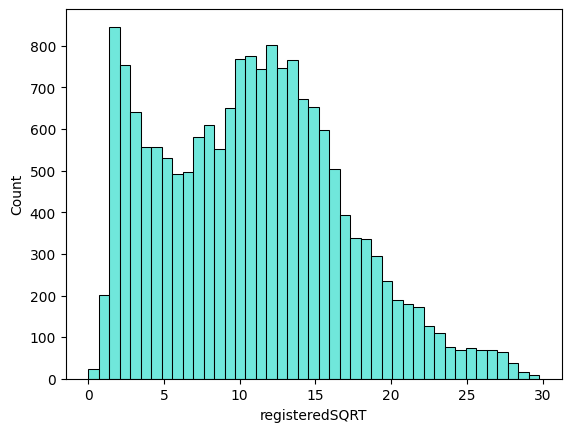

In [52]:
sns.histplot(bike2['registeredSQRT'], color= 'turquoise')

In [53]:
bike2['registeredLOG'] = np.log(bike2['registered'])

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='registeredLOG', ylabel='Count'>

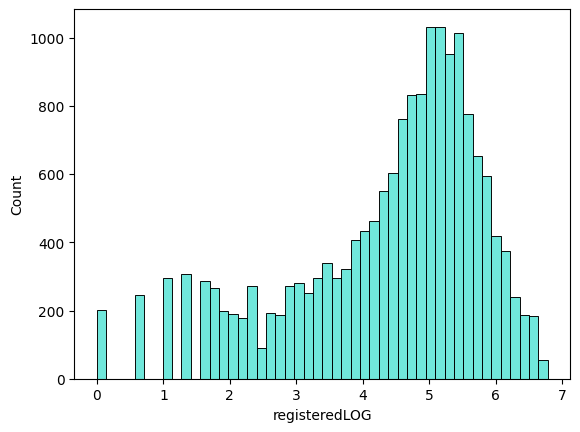

In [54]:
sns.histplot(bike2['registeredLOG'], color ='turquoise')

In [55]:
bike2.dropna(inplace=True)

<AxesSubplot:xlabel='registeredLOG', ylabel='Count'>

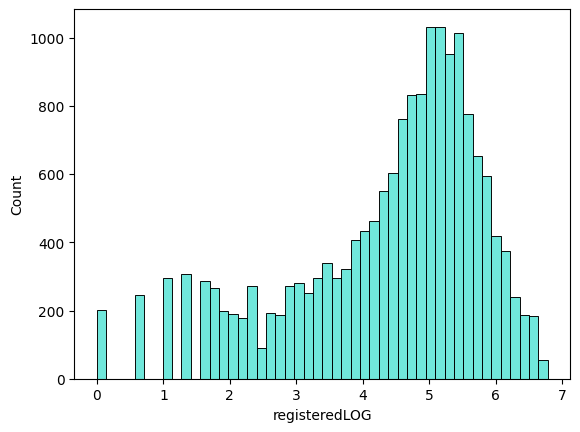

In [56]:
sns.histplot(bike2['registeredLOG'], color= 'turquoise')

In [57]:
bike2['countSQRT']= np.sqrt(bike2['count'])

<AxesSubplot:xlabel='countSQRT', ylabel='Count'>

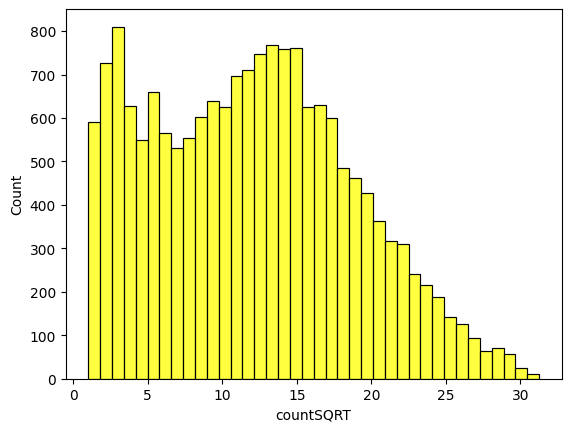

In [58]:
sns.histplot(bike2['countSQRT'], color= 'yellow')

In [59]:
bike2['countLOG']= np.log(bike2['count'])

<AxesSubplot:xlabel='countLOG', ylabel='Count'>

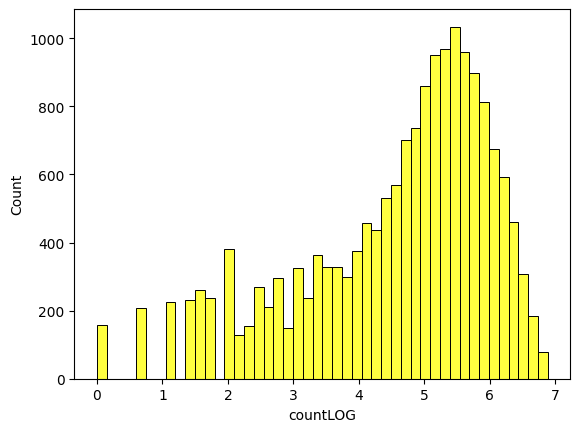

In [60]:
sns.histplot(bike2['countLOG'], color='yellow')

In [61]:
bike2['countLOG1']= boxcox(bike2['count'], 0)

<AxesSubplot:xlabel='countLOG1', ylabel='Count'>

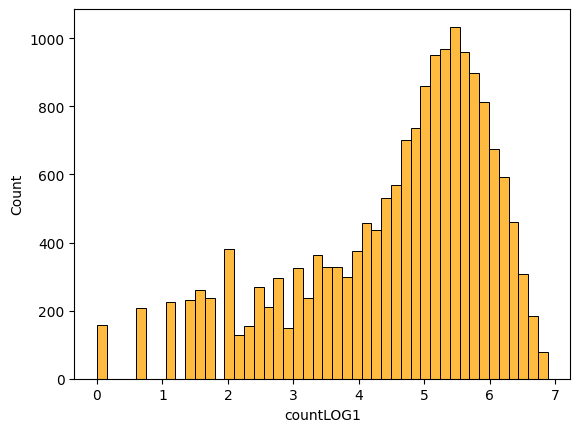

In [62]:
sns.histplot(bike2['countLOG1'], color='orange')

#after attempting to normalize the distribution of the data, the SQRT seems to get it as close to normal distribution as it can get

In [63]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

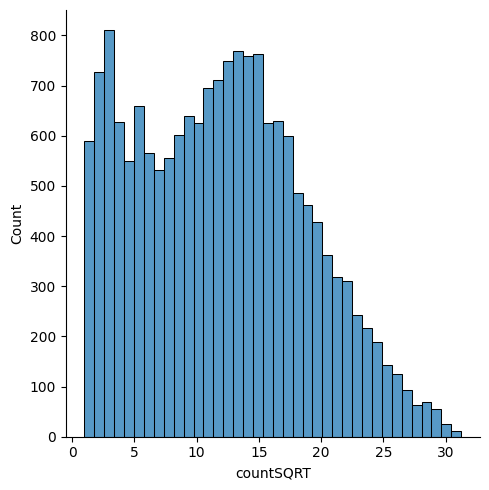

In [64]:
sns.displot(bike2['countSQRT'])

<AxesSubplot:xlabel='weather', ylabel='Count'>

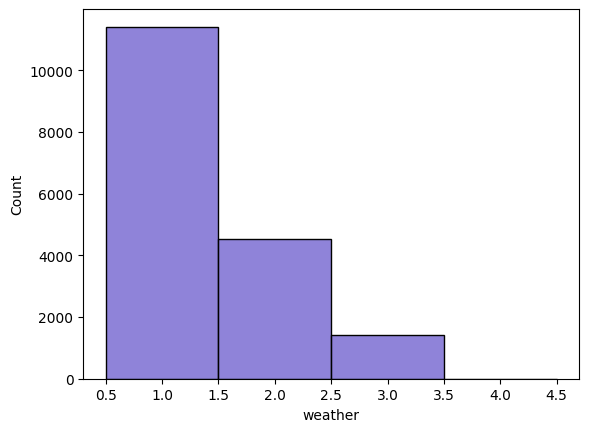

In [65]:
sns.histplot(bike2, x='weather', color='slateblue')

##weathersit: (1: clear, 2: Mist Cloudy, 3: Light snow, 4: Heavy Rain)

<AxesSubplot:xlabel='temp', ylabel='Count'>

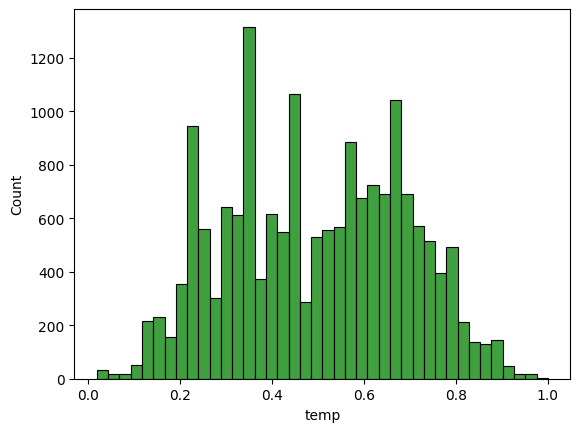

In [66]:
sns.histplot(bike2, x='temp', color='green')

<AxesSubplot:>

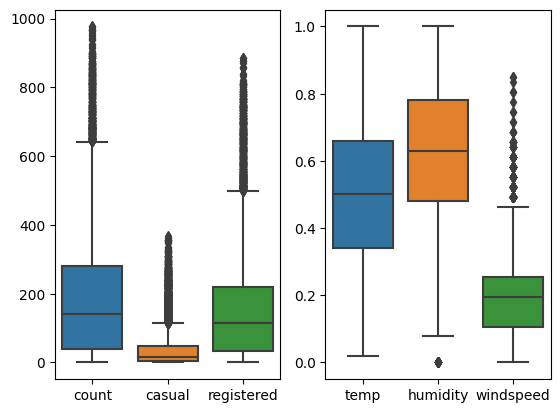

In [67]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(data= bike2[['count',
                          'casual',
                          'registered']],ax=ax1)
sns.boxplot(data=bike2[['temp','humidity',
                          'windspeed']],ax=ax2)

[Text(0.5, 1.0, 'Checking for outliners in day hours')]

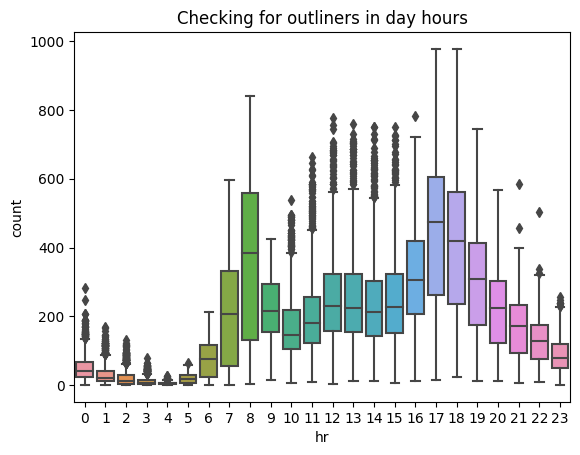

In [68]:
fig,ax = plt.subplots()
sns.boxplot(data=bike2[['count',
                          'hr']],x='hr',y='count',ax=ax)
ax.set(title="Checking for outliners in day hours")

In [69]:
weather_dummies = pd.get_dummies(bike2['weather'], prefix='weather')

#weathersit: (1: clear, 2: Mist Cloudy, 3: Light snow, 4: Heavy Rain)

In [70]:
bike2= pd.concat([bike2, weather_dummies], axis=1)

In [71]:
bike2.head()

,month,season,weekday,workingday,weather,temp,casual,humidity,windspeed,registered,...,casualLOG,registeredSQRT,registeredLOG,countSQRT,countLOG,countLOG1,weather_1,weather_2,weather_3,weather_4
0,1,1,6,0,1,0.24,3,0.81,0.0,13,...,1.098612,3.605551,2.564949,4.000000,2.772589,2.772589,1,0,0,0
1,1,1,6,0,1,0.22,8,0.80,0.0,32,...,2.079442,5.656854,3.465736,6.324555,3.688879,3.688879,1,0,0,0
2,1,1,6,0,1,0.22,5,0.80,0.0,27,...,1.609438,5.196152,3.295837,5.656854,3.465736,3.465736,1,0,0,0
3,1,1,6,0,1,0.24,3,0.75,0.0,10,...,1.098612,3.162278,2.302585,3.605551,2.564949,2.564949,1,0,0,0
4,1,1,6,0,1,0.24,0,0.75,0.0,1,...,-inf,1.000000,0.000000,1.000000,0.000000,0.000000,1,0,0,0


In [72]:
bike2.drop('weather', axis=1)

,month,season,weekday,workingday,temp,casual,humidity,windspeed,registered,count,...,casualLOG,registeredSQRT,registeredLOG,countSQRT,countLOG,countLOG1,weather_1,weather_2,weather_3,weather_4
0,1,1,6,0,0.24,3,0.81,0.0000,13,16,...,1.098612,3.605551,2.564949,4.000000,2.772589,2.772589,1,0,0,0
1,1,1,6,0,0.22,8,0.80,0.0000,32,40,...,2.079442,5.656854,3.465736,6.324555,3.688879,3.688879,1,0,0,0
2,1,1,6,0,0.22,5,0.80,0.0000,27,32,...,1.609438,5.196152,3.295837,5.656854,3.465736,3.465736,1,0,0,0
3,1,1,6,0,0.24,3,0.75,0.0000,10,13,...,1.098612,3.162278,2.302585,3.605551,2.564949,2.564949,1,0,0,0
4,1,1,6,0,0.24,0,0.75,0.0000,1,1,...,-inf,1.000000,0.000000,1.000000,0.000000,0.000000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,12,1,1,1,0.26,11,0.60,0.1642,108,119,...,2.397895,10.392305,4.682131,10.908712,4.779123,4.779123,0,1,0,0
17375,12,1,1,1,0.26,8,0.60,0.1642,81,89,...,2.079442,9.000000,4.394449,9.433981,4.488636,4.488636,0,1,0,0
17376,12,1,1,1,0.26,7,0.60,0.1642,83,90,...,1.945910,9.110434,4.418841,9.486833,4.499810,4.499810,1,0,0,0
17377,12,1,1,1,0.26,13,0.56,0.1343,48,61,...,2.564949,6.928203,3.871201,7.810250,4.110874,4.110874,1,0,0,0


## Train test split

In [73]:
x = bike2[['hr', 'season','humidity', 'windspeed', 'weather_1','weather_2', 'weather_3','weather_4', 'weekday', 'workingday', 'temp', 'month']]
y = bike2['countSQRT']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state=101)


In [134]:
x_test

,month,season,weekday,workingday,weather,temp,humidity,windspeed,hr,casualSQRT,casualLOG,registeredSQRT,registeredLOG,countSQRT,countLOG,countLOG1,weather_1,weather_2,weather_3,weather_4
4945,7,3,5,1,1,0.78,0.52,0.1045,23,5.099020,3.258097,9.486833,4.499810,10.770330,4.753590,4.753590,1,0,0,0
16710,12,4,2,1,1,0.42,0.82,0.1045,1,1.732051,1.098612,4.690416,3.091042,5.000000,3.218876,3.218876,1,0,0,0
3595,6,2,5,1,1,0.72,0.25,0.2836,17,8.544004,4.290459,22.022716,6.184149,23.622024,6.324359,6.324359,1,0,0,0
4959,7,3,6,0,1,0.88,0.29,0.0000,13,11.180340,4.828314,13.527749,5.209486,17.549929,5.730100,5.730100,1,0,0,0
13791,8,3,4,1,1,0.78,0.66,0.0000,20,7.141428,3.931826,19.390719,5.929589,20.663978,6.056784,6.056784,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9474,2,1,6,0,2,0.34,0.61,0.1642,16,4.472136,2.995732,11.090537,4.812184,11.958261,4.962845,4.962845,0,1,0,0
5862,9,3,2,1,2,0.54,0.88,0.3881,18,4.690416,3.091042,18.734994,5.860786,19.313208,5.921578,5.921578,0,1,0,0
1557,3,1,4,1,3,0.38,0.00,0.2836,8,1.000000,0.000000,6.557439,3.761200,6.633250,3.784190,3.784190,0,0,1,0
4111,6,3,6,0,1,0.62,0.61,0.1343,5,2.449490,1.791759,2.828427,2.079442,3.741657,2.639057,2.639057,1,0,0,0


In [74]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(12165, 12) (12165,)
(5214, 12) (5214,)


In [75]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [76]:
predictions = lm.predict(x_test)
predictions

array([13.79645881,  3.72740119, 20.67760745, ...,  8.08590092,
        6.85160895,  8.64936494])

Text(0, 0.5, 'Real Values')

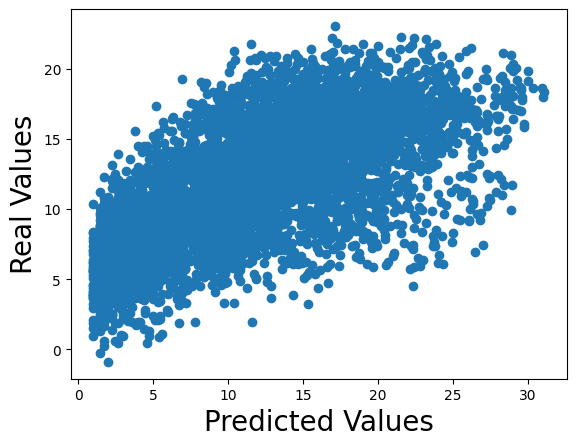

In [77]:
plt.scatter(y_test, predictions)
matplotlib.pyplot.xlabel('Predicted Values', fontsize = 20)
matplotlib.pyplot.ylabel('Real Values', fontsize = 20)

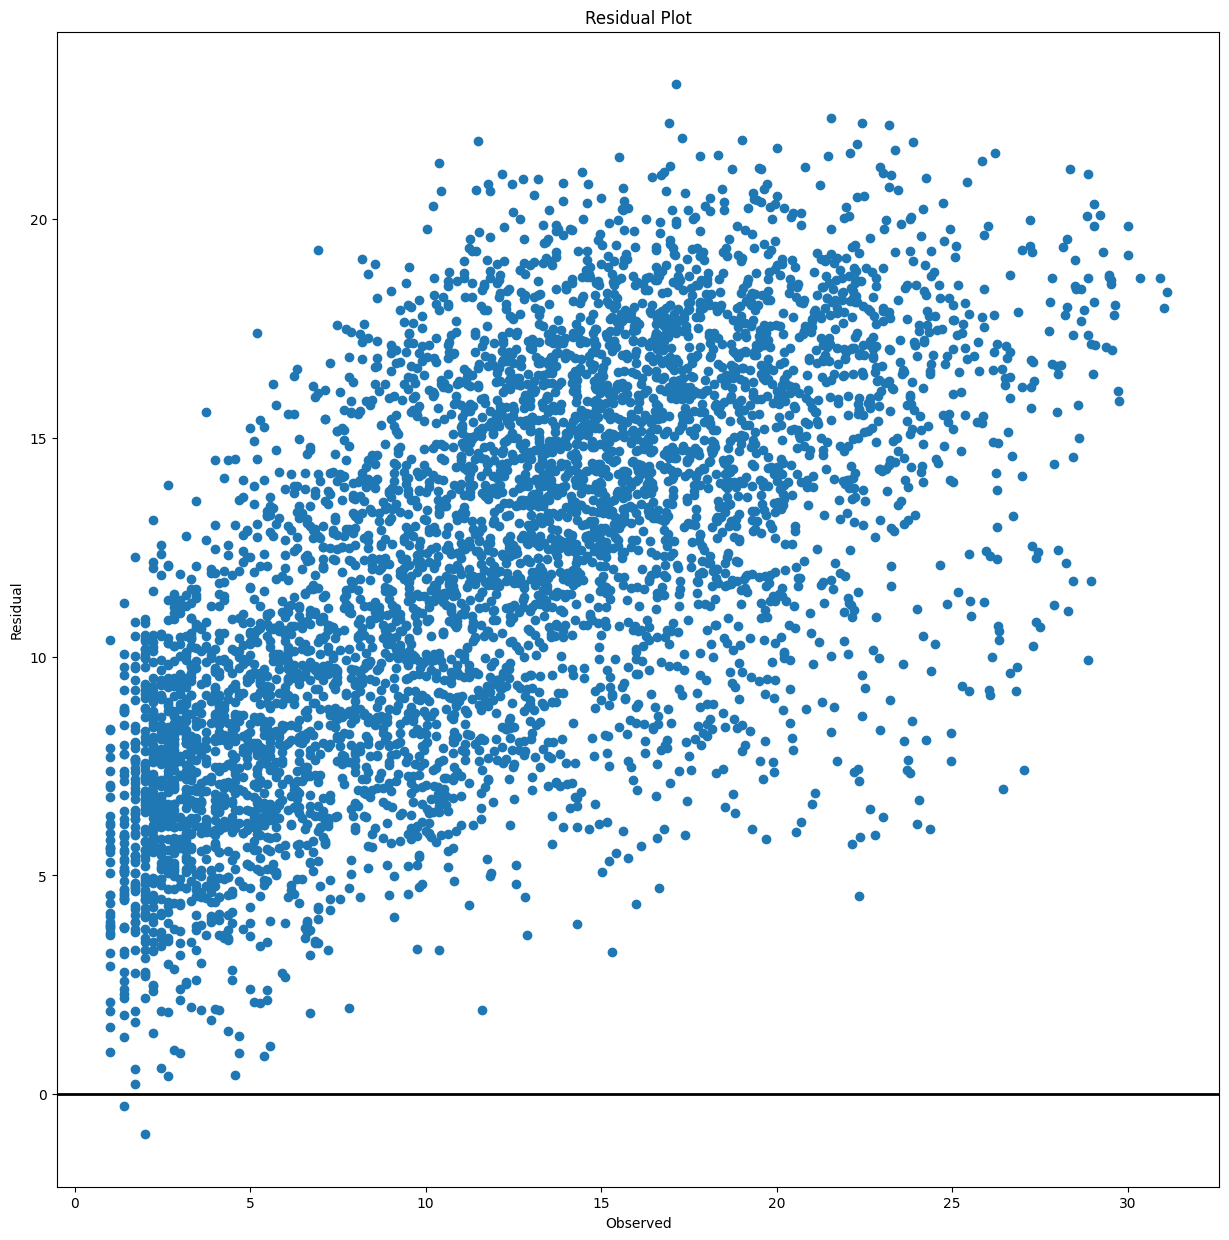

In [78]:
fig,ax = plt.subplots(figsize=(15,15))
ax.scatter(y_test, predictions)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual Plot')
plt.show()

In [79]:
print("Score:", lm.score(x_test, y_test))


Score: 0.42763376586618207


In [80]:
from sklearn import metrics

In [81]:
metrics.mean_absolute_error(y_test, predictions)

3.9858788737761603

In [82]:
metrics.mean_squared_error(y_test, predictions)

25.412021308405887

In [83]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

5.041033753944313

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [85]:
kfold = KFold(n_splits= 3, shuffle=True, random_state=1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [    0     1     2 ... 17374 17377 17378], test: [    4     5     6 ... 17372 17375 17376]
train: [    0     4     5 ... 17376 17377 17378], test: [    1     2     3 ... 17369 17373 17374]
train: [    1     2     3 ... 17374 17375 17376], test: [    0     8     9 ... 17371 17377 17378]


In [86]:
print(cross_val_score(lm, x,y, cv=10))



[-0.40387168  0.4439859   0.17283037  0.40610033  0.31660656  0.19487666
  0.30352712  0.42510176  0.36344148  0.31640591]


In [87]:
from sklearn import svm

In [88]:
##import matplotlib.pyplot as plt
##from importlib import reload
##plt=reload(plt)

In [89]:
r2_scores = cross_val_score(lm, x, y, cv=10)
mse = cross_val_score(lm, x, y, cv=10,scoring='neg_mean_squared_error')


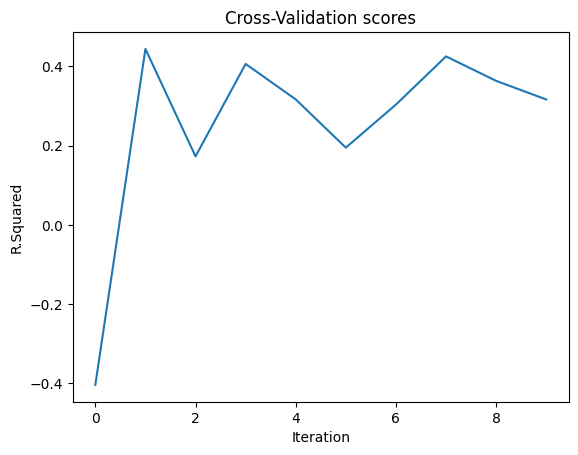

In [91]:
fig,ax = plt.subplots()
ax.plot(range(0,10),
        r2_scores)
ax.set_xlabel('Iteration')
ax.set_ylabel('R.Squared')
ax.set_title('Cross-Validation scores')
plt.show()

In [92]:
print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse))

R-squared::[-0.40387168  0.4439859   0.17283037  0.40610033  0.31660656  0.19487666
  0.30352712  0.42510176  0.36344148  0.31640591]
MSE::[-20.92764849 -18.0854686  -29.50061286 -21.62441988 -20.08368206
 -27.99167072 -37.47380856 -30.70045409 -37.70994262 -32.31503203]


In [93]:
x = bike2.drop('count', axis=1)
y = bike2['count']





In [95]:
bike2.head()

,month,season,weekday,workingday,weather,temp,casual,humidity,windspeed,registered,...,casualLOG,registeredSQRT,registeredLOG,countSQRT,countLOG,countLOG1,weather_1,weather_2,weather_3,weather_4
0,1,1,6,0,1,0.24,3,0.81,0.0,13,...,1.098612,3.605551,2.564949,4.000000,2.772589,2.772589,1,0,0,0
1,1,1,6,0,1,0.22,8,0.80,0.0,32,...,2.079442,5.656854,3.465736,6.324555,3.688879,3.688879,1,0,0,0
2,1,1,6,0,1,0.22,5,0.80,0.0,27,...,1.609438,5.196152,3.295837,5.656854,3.465736,3.465736,1,0,0,0
3,1,1,6,0,1,0.24,3,0.75,0.0,10,...,1.098612,3.162278,2.302585,3.605551,2.564949,2.564949,1,0,0,0
4,1,1,6,0,1,0.24,0,0.75,0.0,1,...,-inf,1.000000,0.000000,1.000000,0.000000,0.000000,1,0,0,0


In [132]:
x = bike2.drop(['count', 'registered', 'casual'], axis=1)
y = bike2['count']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [133]:
decisionTree = DecisionTreeRegressor(random_state=76)


In [112]:
bike2

,month,season,weekday,workingday,weather,temp,casual,humidity,windspeed,registered,...,casualLOG,registeredSQRT,registeredLOG,countSQRT,countLOG,countLOG1,weather_1,weather_2,weather_3,weather_4
0,1,1,6,0,1,0.24,3,0.81,0.0000,13,...,1.098612,3.605551,2.564949,4.000000,2.772589,2.772589,1,0,0,0
1,1,1,6,0,1,0.22,8,0.80,0.0000,32,...,2.079442,5.656854,3.465736,6.324555,3.688879,3.688879,1,0,0,0
2,1,1,6,0,1,0.22,5,0.80,0.0000,27,...,1.609438,5.196152,3.295837,5.656854,3.465736,3.465736,1,0,0,0
3,1,1,6,0,1,0.24,3,0.75,0.0000,10,...,1.098612,3.162278,2.302585,3.605551,2.564949,2.564949,1,0,0,0
4,1,1,6,0,1,0.24,0,0.75,0.0000,1,...,-inf,1.000000,0.000000,1.000000,0.000000,0.000000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,12,1,1,1,2,0.26,11,0.60,0.1642,108,...,2.397895,10.392305,4.682131,10.908712,4.779123,4.779123,0,1,0,0
17375,12,1,1,1,2,0.26,8,0.60,0.1642,81,...,2.079442,9.000000,4.394449,9.433981,4.488636,4.488636,0,1,0,0
17376,12,1,1,1,1,0.26,7,0.60,0.1642,83,...,1.945910,9.110434,4.418841,9.486833,4.499810,4.499810,1,0,0,0
17377,12,1,1,1,1,0.26,13,0.56,0.1343,48,...,2.564949,6.928203,3.871201,7.810250,4.110874,4.110874,1,0,0,0


In [113]:
bike1

,mnth,season,weekday,workingday,weathersit,temp,casual,hum,windspeed,registered,cnt,hr
0,1,1,6,0,1,0.24,3,0.81,0.0000,13,16,0
1,1,1,6,0,1,0.22,8,0.80,0.0000,32,40,1
2,1,1,6,0,1,0.22,5,0.80,0.0000,27,32,2
3,1,1,6,0,1,0.24,3,0.75,0.0000,10,13,3
4,1,1,6,0,1,0.24,0,0.75,0.0000,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,12,1,1,1,2,0.26,11,0.60,0.1642,108,119,19
17375,12,1,1,1,2,0.26,8,0.60,0.1642,81,89,20
17376,12,1,1,1,1,0.26,7,0.60,0.1642,83,90,21
17377,12,1,1,1,1,0.26,13,0.56,0.1343,48,61,22


In [118]:
x = bike1.drop(['cnt',"casual","registered"], axis=1)
y = bike1['cnt']

x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, test_size=0.3, random_state=76)

decisionTree = DecisionTreeRegressor(random_state=76)

decisionTree.fit(x_train1, y_train1)


DecisionTreeRegressor(random_state=76)

In [119]:
decisionTree.score(x_test1,y_test1)

0.7149730737278082

In [120]:
x_test1

,mnth,season,weekday,workingday,weathersit,temp,hum,windspeed,hr
4945,7,3,5,1,1,0.78,0.52,0.1045,23
16710,12,4,2,1,1,0.42,0.82,0.1045,1
3595,6,2,5,1,1,0.72,0.25,0.2836,17
4959,7,3,6,0,1,0.88,0.29,0.0000,13
13791,8,3,4,1,1,0.78,0.66,0.0000,20
...,...,...,...,...,...,...,...,...,...
9474,2,1,6,0,2,0.34,0.61,0.1642,16
5862,9,3,2,1,2,0.54,0.88,0.3881,18
1557,3,1,4,1,3,0.38,0.00,0.2836,8
4111,6,3,6,0,1,0.62,0.61,0.1343,5


In [122]:
forest = RandomForestRegressor(n_estimators=500, random_state=76)
forest.fit(x_train1, y_train1)

RandomForestRegressor(n_estimators=500, random_state=76)

In [123]:
print(forest)

RandomForestRegressor(n_estimators=500, random_state=76)


In [125]:
forest.score(x_test1,y_test1)


0.8556207906247015

In [138]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [130]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestRegressor(n_estimators=n, random_state=76)
    result=np.mean(cross_val_score(forest, x_train1, y_train1, cv=3))
    print(n, result)
    results.append(result)

1 0.6951802761207925
4 0.8137290987812323
5 0.8210405838901277
8 0.8334845179638304
10 0.8376109875074338
20 0.8445784392934613
50 0.8509029729023719
75 0.8521659826471591
100 0.8524609243780304
250 0.8537196565245323
500 0.8543563199171237


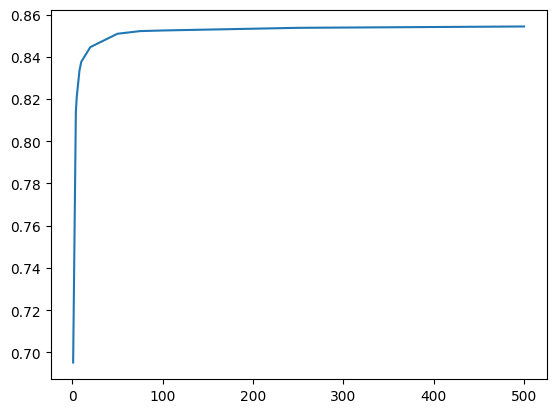

In [131]:
plt.plot(n_estimators_array, results)
#choose 75 to save computation time

In [146]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [135]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [1, 4, 5, 8, 10, 20, 50, 75, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [1, 4, 5, 8, 10, 20, 50, 75, None], 'min_samples_leaf': [1, 2, 4]}


In [142]:
rf = RandomForestRegressor(n_estimators=10)

In [152]:
rf = RandomForestRegressor(n_estimators=10)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [153]:
rf_random.fit(x_train1, y_train1)

/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 81 is smaller than n_iter=90. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_fore

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=10),
                   n_iter=90,
                   param_distributions={'max_depth': [1, 4, 5, 8, 10, 20, 50,
                                                      75, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [154]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20}

In [156]:
forest = RandomForestRegressor(n_estimators=10, min_samples_leaf=2, max_features="auto", max_depth=20)
forest.fit(x_train1, y_train1)

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=2,
                      n_estimators=10)

In [162]:
forestPredictions = forest.predict(x_test1)
print((y_test1,forestPredictions))

(4945     116
16710     25
3595     558
4959     308
13791    427
        ... 
9474     143
5862     373
1557      44
4111      14
1410       4
Name: cnt, Length: 5214, dtype: int64, array([158.86166667,  14.43333333, 760.66333333, ..., 189.25333333,
        10.15166667,   7.5       ]))


In [169]:

bike4=pd.DataFrame({'Actual':y_test1, 'Predicted':forestPredictions})
bike4

,Actual,Predicted
4945,116,158.861667
16710,25,14.433333
3595,558,760.663333
4959,308,337.684286
13791,427,350.220000
...,...,...
9474,143,166.240000
5862,373,265.641667
1557,44,189.253333
4111,14,10.151667


In [170]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, forestPredictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, forestPredictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, forestPredictions)))


Mean Absolute Error: 46.88870362243328
Mean Squared Error: 5100.236461153969
Root Mean Squared Error: 71.41593982546172


In [172]:
bike4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5214 entries, 4945 to 1410
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     5214 non-null   int64  
 1   Predicted  5214 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 122.2 KB


In [173]:
bike4.describe()

,Actual,Predicted
count,5214.000000,5214.000000
mean,190.291715,190.464573
std,180.363545,166.639345
min,1.000000,1.190000
25%,41.000000,51.387917
50%,141.000000,156.352917
75%,285.000000,279.502262
max,970.000000,863.980000
